In [1]:
import random
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from skimage.metrics import structural_similarity as ssim
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
import copy
import warnings
warnings.filterwarnings("ignore")

In [2]:
img_path = r'CHASEDB1/Image_01R.jpg'
ground_img_path = r'CHASEDB1/Image_01R_1stHO.png'

img = Image.open(img_path)
ground_img = Image.open(ground_img_path)

img_array = np.array(img)
ground_img_array = np.array(ground_img)

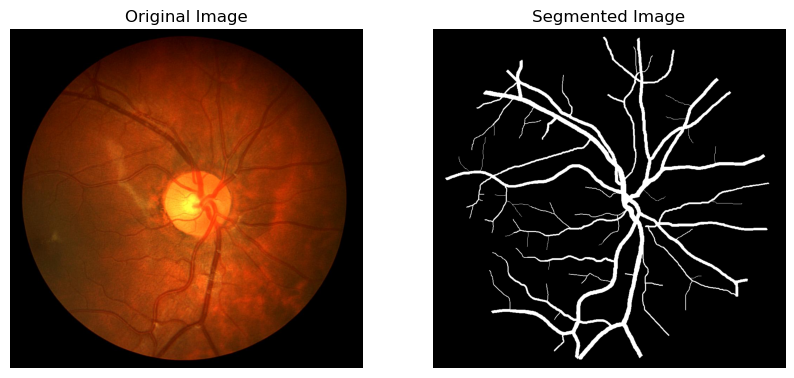

In [3]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(img_array)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(ground_img_array, cmap='grey')
plt.title("Segmented Image")
plt.axis('off')

plt.show()

In [4]:
def accuracy_func(image1, image2):

    segmented_vessels = image1
    segmented_image = image2

    ssim_score = ssim(segmented_image, segmented_vessels, data_range=255)
    psnr_score = float('inf')
    mse = np.mean((image1 - image2) ** 2)
    if mse != 0:
        max_pixel = 255.0
        psnr_score = 20 * np.log10(max_pixel / np.sqrt(mse))

    generated_binary = (segmented_vessels > 0).astype(np.uint8)
    target_binary = (segmented_image > 0).astype(np.uint8)

    tn, fp, fn, tp = confusion_matrix(target_binary.ravel(), generated_binary.ravel()).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = 2/((1/specificity)+(1/sensitivity))
    
    print(f'SSIM: {ssim_score:.4f}')
    print(f'PSNR: {psnr_score:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')
    print(f'f1: {f1:.4f}')

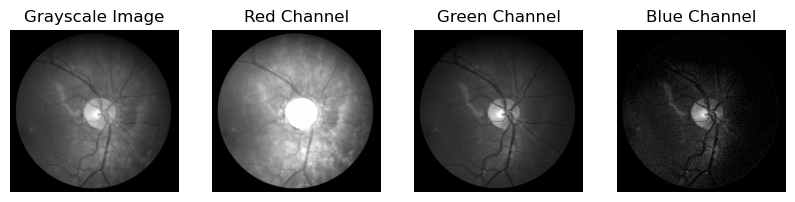

In [5]:
img_gray = img.convert('L')
img_gray_array = np.array(img_gray)

red_channel = img_array[:, :, 0]
green_channel = img_array[:, :, 1]
blue_channel = img_array[:, :, 2]

plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

plt.show()

In [6]:
green_channel = img_array[:, :, 1]

In [7]:
def normalize_image(image, a, b):
    """
    Normalize image intensities to a randomly chosen range [a, b].
    """
    I_min, I_max = np.min(image), np.max(image)
    return ((image - I_min) * (b - a) / (I_max - I_min) + a).astype(np.uint8)

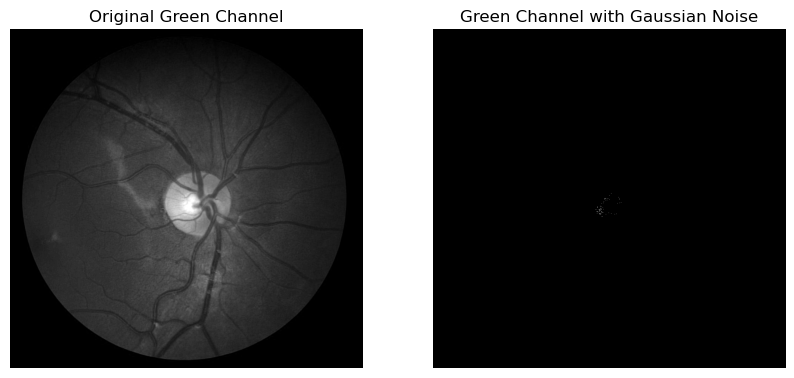

In [ ]:
a, b = random.randint(0, 50), random.randint(200, 255)
normalized_green_channel = normalize_image(green_channel, a, b)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(green_channel, cmap='gray')
plt.title('Original Green Channel')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_green_channel, cmap='gray')
plt.title('Green Channel with Gaussian Noise')
plt.axis('off')

plt.show()